KELOMPOK 7 - RB [Ant Colony Optimization pada Optimasi Pemiliharaan Gedung Indekos dengan Knapsack Problem Integer 1/0]

BINTANG ANNISA MAHARANI 120450002 -
GATHAN OKTARIANSYAH 120450010 -
MASAYU FRANSTIKA 120450016 -
SILVIA DAMAYANTI 120450046

In [4655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [4656]:
df = pd.read_csv('Data_SI_Kelompok7.csv')
df.dtypes

Weight      int64
Profit    float64
dtype: object

In [4657]:
df.head()


,Weight,Profit
0,47,3.57
1,42,7.14
2,21,14.29
3,14,10.71
4,23,23.43


In [4658]:
weights = df['Weight'].values
datas = [[weights[i] + weights[j] if i!=j else 0 for j in range(len(weights))] for i in range(len(weights))]
adj_mat_w = pd.DataFrame(datas)
adj_mat_w.head()

,0,1,2,3,4
0,0,89,68,61,70
1,89,0,63,56,65
2,68,63,0,35,44
3,61,56,35,0,37
4,70,65,44,37,0


In [4659]:
profits = df['Profit'].values
datas2 = [[profits[i] + profits[j] if i!=j else 0 for j in range(len(profits))] for i in range(len(profits))]
adj_mat_p = pd.DataFrame(datas2)
adj_mat_p.head()

,0,1,2,3,4
0,0.00,10.71,17.86,14.28,27.00
1,10.71,0.00,21.43,17.85,30.57
2,17.86,21.43,0.00,25.00,37.72
3,14.28,17.85,25.00,0.00,34.14
4,27.00,30.57,37.72,34.14,0.00


INISIALISASI PHEROMONE

In [4660]:
n_semut = 3
dim_semut = len(profits)
tau_awal = 1

In [4661]:
pheromone_weight = np.ones(shape=(dim_semut,dim_semut) * tau_awal)
np.fill_diagonal(pheromone_weight,0)
pheromone_weight = pd.DataFrame(pheromone_weight)
pheromone_weight.head()

,0,1,2,3,4
0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0
4,1.0,1.0,1.0,1.0,0.0


In [4662]:
pheromone_profit = np.ones(shape=(dim_semut,dim_semut) * tau_awal)
np.fill_diagonal(pheromone_profit,0)
pheromone_profit = pd.DataFrame(pheromone_profit)
pheromone_profit.head()

,0,1,2,3,4
0,0.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0
4,1.0,1.0,1.0,1.0,0.0


In [4663]:
n_partikel = 3
weights = df['Weight'].values
profits = df['Profit'].values
n_dim = len(weights)

In [4664]:
def f_con_w(X,weights,lim):
    ws= sum(map(lambda x,w: x*w, X, weights))
    return ws <= lim

def f_obj(X,profits):
    return sum(map(lambda x,p: x*p, X, profits))

def fitness(X,profits,weights,lim):
  return f_obj(X,profits) if f_con_w(X,weights,lim) else 0

In [4665]:
f_obj(range(dim_semut),adj_mat_w)

30

In [4666]:
not_take = [i for i in range(dim_semut)]
semut = [[[],not_take] for i in range(n_semut)]

In [4667]:
print(semut[0], end='')

[[], [0, 1, 2, 3, 4]]

In [4668]:
def trf_pilih(semut):
  barang_dipilih = semut[0] # semut[0] maksudnya elemen dari 1 semut yang visited / barang yang dipilih
  arr_kosong = list(map( lambda x:0 ,range( len(semut[0]) + len(semut[1]) ))) # inisialisasi array kosong

  for i in range(len(barang_dipilih)):
    for j in range(len(arr_kosong)):
      if barang_dipilih[i]==j:
        arr_kosong[barang_dipilih[i]] = 1
  return arr_kosong

semut = [ [1,2,3],  [0] + list(range(1,100)) ] 
print(semut)

[[1, 2, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]


In [4669]:
transformed = trf_pilih(semut)
print(transformed)

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4670]:
fitness(transformed,adj_mat_p,adj_mat_w,100)

6

DISKRITISASI

In [4671]:
def sigmoid(x):
    return 1/(np.exp(-x) + 1)

def diskritize(individus):
    return np.round(sigmoid(individus))

In [4672]:
x = np.random.uniform(-4,4,(n_partikel,n_dim))
x

array([[ 0.71213854, -0.75319745,  0.50823008, -1.90592102, -0.08009617],
       [ 2.09500951, -0.75085219, -2.81864706,  3.37341565,  0.07830086],
       [ 0.70396348,  1.71499991, -2.01379031,  2.3980451 ,  3.28938929]])

In [4673]:
sigmoid(x)

array([[0.67087353, 0.32012499, 0.62439147, 0.1294398 , 0.47998666],
       [0.89041718, 0.32063564, 0.0563248 , 0.9668633 , 0.51956522],
       [0.66906594, 0.84748367, 0.11776261, 0.91667811, 0.964063  ]])

In [4674]:
k = np.vectorize(lambda x : round(x))
k(sigmoid(x))

array([[1, 0, 1, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 0, 1, 1]])

In [4675]:
d_partikel = k(sigmoid(x))
d_partikel[1]

array([1, 0, 0, 1, 1])

In [4676]:
def generate_individus(n_semut,dim_semut,a,b):
    return np.random.uniform(a,b,size=(n_semut,dim_semut))

individus = generate_individus(n_semut,dim_semut,-4,4)

In [4677]:
def calc_fitness(individus,profits,weights,lim):
  return np.array([[fitness(i,adj_mat_p,adj_mat_w,100) for i in individus]])

def individu_w_f(individus,fitness_n_semut):
  return np.concatenate((individus,fitness_n_semut),axis=1)

def sort_individu(individus_w_fitness):
      return individus_w_fitness[individus_w_fitness[:,-1].argsort()]

In [4678]:
fitness_n_semut = calc_fitness(individus,adj_mat_p,adj_mat_w,1000)
#i_w_f = individu_w_f(individus,fitness_n_semut)
individu_sorted = sort_individu(fitness_n_semut)

In [4679]:
fitness_n_semut

array([[12.41887412, -3.28429671, 14.253392  ]])

In [4680]:
def generate_adj_mat_profit(df):
    profits = df['Profit'].values
    datas2 = [[profits[i] + profits[j] if i!=j else 0 for j in range(len(profits))] for i in range(len(profits))]
    adj_mat_p = pd.DataFrame(datas2)
    return adj_mat_p

def generate_adj_mat_weight(df):
    weights = df['Weight'].values
    datas = [[weights[i] + weights[j] if i!=j else 0 for j in range(len(weights))] for i in range(len(weights))]
    adj_mat_w = pd.DataFrame(datas)
    return adj_mat_w

def generate_1_semut(ndim):
    return [[], list(range(ndim))]
 
def generate_individus(n_individu,ndim):
    return [generate_1_semut(ndim) for i in range(n_individu)]

def generate_pheromones(ndim,tau_awal):
    pheromones = np.ones(shape=(ndim,ndim)) * tau_awal
    np.fill_diagonal(pheromones,0)
    return pd.DataFrame(pheromones)

def generate_delta_pheromones(dim_semut):
    return generate_pheromones(dim_semut,0)

def trf_pilih(barang_dipilih,ndim):
    arr_kosong = list(map( lambda x:0 ,range(ndim))) # inisialisasi array kosong
   
    for i in range(len(barang_dipilih)):
        for j in range(len(arr_kosong)):
            if barang_dipilih[i]==j:
                arr_kosong[barang_dipilih[i]] = 1
    return arr_kosong

def f_obj(X,profits):
    return sum(map(lambda x,p: x*p, X, profits))

def f_con_w(X,weights,lim):
    ws = sum(map(lambda x,w: x*w, X, weights))
    return ws <= lim

def ro_1(el_c,el_t,pher,adj_mat,params):
    return ( pher.iloc[el_c,el_t] )**params['alpha'] * ( 1/adj_mat.iloc[el_c,el_t])**params['beta']

def ro_1_all(semut,pher,adj_mat,params):
    return [ ro_1(semut[0][-1],el_t,pher,adj_mat,params) for el_t in semut[1] ]

def transition_prob(semut,pher,adj_mat,params):
    pher = generate_pheromones(params['ndim'],1)
    adj_mat = generate_adj_mat_profit(df)
    r = ro_1_all(semut,pher,adj_mat,params)
    total_prob = sum(r)
    return [p/total_prob for p in r]

def pilih_next_barang(semut,pher,adj_mat,params):
    df_prob = pd.DataFrame( {'next':semut[1] , 'prob':transition_prob(semut,pher,adj_mat,params) } )
    number = np.random.rand(1)
    if number > 0.5:
        choosen = df_prob.sample(n=1,weights='prob').iloc[0,0]
        return nv_to_v(semut,choosen)
    else:
        return semut

def pilih_next_barang_semua(semut,pher,adj_mat,params):
    return [pilih_next_barang(s,pher,adj_mat,params) for s in semut]

def f(X,adj_mat,tipe='full'):
    return sum([ adj_mat.iloc[ X[i],X[i+1] ] for i in range(len(X) - 1) ]) + (adj_mat.iloc[ X[-1],X[0] ] if tipe=='full' else 0)

def update_delta_pheromones(semut,delta_pher,adj_mat,params):
    temp = generate_delta_pheromones(params['ndim'])
    for s in semut:
        Lk = f_obj(s[0],adj_mat)
        if len(s[0]) >= 2:
            temp.loc[ s[0][-2] ][ s[0][-1] ] = delta_pher[ s[0][-2] ][ s[0][-1] ] + (params['Q']/Lk)
    return temp

def update_pheromones(pher,delta_pher,semut,adj_mat_p,params):
    return params['rho'] * pher + update_delta_pheromones(semut,delta_pher,adj_mat_p,params)

def sol(semut):
    return np.array([s[0] for s in semut])

def calc_fitness(X,adj_mat_p,adj_mat_w,lim): 
    return f_obj(X,adj_mat_p) if f_con_w(X,adj_mat_w,lim) else 0

def calc_fitness_all(semut,adj_mat_p,adj_mat_w,lim,ndim):
    return np.array([calc_fitness(trf_pilih(s,ndim),adj_mat_p,adj_mat_w,lim) for s in semut])

def find_best(sl,fitness):
    idxs = np.argsort(fitness)
    return np.append(sl[idxs][0],fitness[idxs][0])

def nv_to_v(semut,el):
    temp = semut.copy()
    temp[0].append(el)
    temp[1].remove(el)
    return temp

def initialization(semut):
    return [ nv_to_v(s,s[1][ np.random.randint(0,len(s[1]))] ) for s in semut ]

def satu_cycle(pheromones,adj_mat_p,adj_mat_w,params):
    semut = generate_individus(params['n_individu'],params['ndim'])
    semut = initialization(semut)
    delta_pheromones = generate_delta_pheromones(params['ndim'])
    
    t = 1
    while t < params['ndim']:
        semut = pilih_next_barang_semua(semut,pheromones.values,adj_mat_p,params)
        pheromones = update_pheromones(pheromones,delta_pheromones,semut,adj_mat_p,params)
        delta_pheromones = generate_delta_pheromones(params['ndim'])
        t += 1
    
    sl = sol(semut)
    fitness = calc_fitness_all(sl,adj_mat_p,adj_mat_w,params['lim'],params['ndim'])
    return find_best(sl,fitness),pheromones

def ACO(params,df):
    adj_mat_p = generate_adj_mat_profit(df)
    adj_mat_w = generate_adj_mat_weight(df)
    generasi = 0
    bests = []
    pheromones = generate_pheromones(params['ndim'],1)
    delta_pheromones = generate_delta_pheromones(params['ndim'])
    
    while generasi < params['max_generasi']:
        best,pheromones = satu_cycle(pheromones,adj_mat_p,adj_mat_w,params)
        bests.append(  trf_pilih(best[:-1].tolist(), params['ndim'] ) + [best.tolist()[-1] ])
        generasi += 1
        
    return pd.DataFrame(bests)

In [4681]:
prof = df['Profit'].values

params = {
    'alpha': 1,
    'beta': 1,
    'rho': 0.7,
    'Q': 1,
    'n_individu':10,
    'ndim':len(prof),
    'lim':100,
    'max_generasi':7
}

hasil = ACO(params,df)
df_hasil = pd.DataFrame(hasil)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_14552/4178307122.py:76: RuntimeWarning: divide by zero encountered in longlong_scalars
  temp.loc[ s[0][-2] ][ s[0][-1] ] = delta_pher[ s[0][-2] ][ s[0][-1] ] + (params['Q']/Lk)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_14552/4178307122.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([s[0] for s in semut])


In [4682]:
hasil

,0,1,2,3,4,5
0,1,1,0,0,0,1
1,1,1,0,0,0,1
2,0,0,1,0,0,2
3,0,1,0,0,0,1
4,1,0,0,0,0,0
5,1,1,0,0,0,1
6,1,1,0,0,0,1


In [4683]:
semut = generate_individus(params['n_individu'],params['ndim'])
semut = initialization(semut)

sl = sol(semut)



arr_kosong = list(map( lambda x:0 ,range( len(sl[0]) + len(sl[1]) ))) # inisialisasi array kosong
    
for s in range(len(sl)):
    barang_dipilih = sl[s]
    for i in range(len(barang_dipilih)):
        for j in range(len(arr_kosong)):
            if barang_dipilih[i]==j:
                arr_kosong[barang_dipilih[i]] = 1

In [4684]:
semut

[[[4], [0, 1, 2, 3]],
 [[3], [0, 1, 2, 4]],
 [[1], [0, 2, 3, 4]],
 [[0], [1, 2, 3, 4]],
 [[1], [0, 2, 3, 4]],
 [[1], [0, 2, 3, 4]],
 [[0], [1, 2, 3, 4]],
 [[4], [0, 1, 2, 3]],
 [[1], [0, 2, 3, 4]],
 [[4], [0, 1, 2, 3]]]

In [4685]:
sl

array([[4],
       [3],
       [1],
       [0],
       [1],
       [1],
       [0],
       [4],
       [1],
       [4]])

In [4686]:
df_hasil

,0,1,2,3,4,5
0,1,1,0,0,0,1
1,1,1,0,0,0,1
2,0,0,1,0,0,2
3,0,1,0,0,0,1
4,1,0,0,0,0,0
5,1,1,0,0,0,1
6,1,1,0,0,0,1


In [4687]:
print(type(sl[0][0]))

<class 'numpy.int32'>


In [4688]:
df.describe()

,Weight,Profit
count,5.000000,5.000000
mean,29.400000,11.828000
std,14.293355,7.617245
min,14.000000,3.570000
25%,21.000000,7.140000
50%,23.000000,10.710000
75%,42.000000,14.290000
max,47.000000,23.430000


In [4689]:
adj_mat_p = generate_adj_mat_profit(df)
adj_mat_w = generate_adj_mat_weight(df)
pheromones = generate_pheromones(params['ndim'],1)

satu_cycle(pheromones,adj_mat_p,adj_mat_w,params)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_14552/4178307122.py:76: RuntimeWarning: divide by zero encountered in longlong_scalars
  temp.loc[ s[0][-2] ][ s[0][-1] ] = delta_pher[ s[0][-2] ][ s[0][-1] ] + (params['Q']/Lk)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_14552/4178307122.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([s[0] for s in semut])


(array([2, 1, 3], dtype=int64),
           0         1       2         3       4
 0  0.000000  1.090100  0.2401  0.403433  0.3276
 1       inf  0.000000  1.0351  0.240100  0.2401
 2       inf  1.864009  0.0000  0.365100  0.2401
 3  0.573433  1.630100  0.2401  0.000000  0.3626
 4  0.240100  0.240100  0.3276  0.809924  0.0000)

<AxesSubplot:>

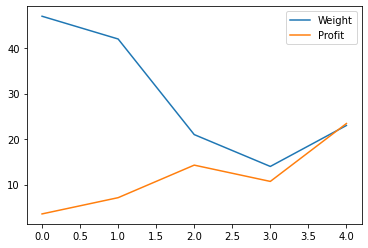

In [4690]:
df.plot()

<AxesSubplot:>

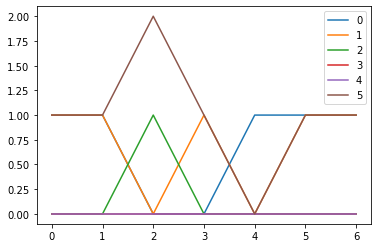

In [4691]:
df_hasil.plot()